In [36]:
import requests

results = []
q = "created:>2017-01-01"

def search_repo_paging(q):
    params = {'q' : q, 'sort' : 'forks', 'order': 'desc', 'per_page' : 100}
    url = 'https://api.github.com/search/repositories'

    while True:

        res = requests.get(url, params = params)
        result = res.json()
        results.extend(result['items'])
        params = {}

        try:
            url = res.links['next']['url']
        except:
            break

In [26]:
from pandas.io.json import json_normalize

import json

import pandas as pd
import bson.json_util as json_util

sanitized = json.loads(json_util.dumps(results))
normalized = json_normalize(sanitized)
df = pd.DataFrame(normalized)

In [23]:
df.head(5)

,archive_url,assignees_url,blobs_url,branches_url,clone_url,collaborators_url,comments_url,commits_url,compare_url,contents_url,...,subscribers_url,subscription_url,svn_url,tags_url,teams_url,trees_url,updated_at,url,watchers,watchers_count
0,https://api.github.com/repos/hasura-imad/imad-...,https://api.github.com/repos/hasura-imad/imad-...,https://api.github.com/repos/hasura-imad/imad-...,https://api.github.com/repos/hasura-imad/imad-...,https://github.com/hasura-imad/imad-app-v2.git,https://api.github.com/repos/hasura-imad/imad-...,https://api.github.com/repos/hasura-imad/imad-...,https://api.github.com/repos/hasura-imad/imad-...,https://api.github.com/repos/hasura-imad/imad-...,https://api.github.com/repos/hasura-imad/imad-...,...,https://api.github.com/repos/hasura-imad/imad-...,https://api.github.com/repos/hasura-imad/imad-...,https://github.com/hasura-imad/imad-app-v2,https://api.github.com/repos/hasura-imad/imad-...,https://api.github.com/repos/hasura-imad/imad-...,https://api.github.com/repos/hasura-imad/imad-...,2017-05-17T13:02:53Z,https://api.github.com/repos/hasura-imad/imad-...,2,2
1,https://api.github.com/repos/learn-co-students...,https://api.github.com/repos/learn-co-students...,https://api.github.com/repos/learn-co-students...,https://api.github.com/repos/learn-co-students...,https://github.com/learn-co-students/js-if-els...,https://api.github.com/repos/learn-co-students...,https://api.github.com/repos/learn-co-students...,https://api.github.com/repos/learn-co-students...,https://api.github.com/repos/learn-co-students...,https://api.github.com/repos/learn-co-students...,...,https://api.github.com/repos/learn-co-students...,https://api.github.com/repos/learn-co-students...,https://github.com/learn-co-students/js-if-els...,https://api.github.com/repos/learn-co-students...,https://api.github.com/repos/learn-co-students...,https://api.github.com/repos/learn-co-students...,2017-04-24T18:46:46Z,https://api.github.com/repos/learn-co-students...,0,0
2,https://api.github.com/repos/SunJieMing/js-min...,https://api.github.com/repos/SunJieMing/js-min...,https://api.github.com/repos/SunJieMing/js-min...,https://api.github.com/repos/SunJieMing/js-min...,https://github.com/SunJieMing/js-minicamp-home...,https://api.github.com/repos/SunJieMing/js-min...,https://api.github.com/repos/SunJieMing/js-min...,https://api.github.com/repos/SunJieMing/js-min...,https://api.github.com/repos/SunJieMing/js-min...,https://api.github.com/repos/SunJieMing/js-min...,...,https://api.github.com/repos/SunJieMing/js-min...,https://api.github.com/repos/SunJieMing/js-min...,https://github.com/SunJieMing/js-minicamp-home...,https://api.github.com/repos/SunJieMing/js-min...,https://api.github.com/repos/SunJieMing/js-min...,https://api.github.com/repos/SunJieMing/js-min...,2017-07-12T20:08:57Z,https://api.github.com/repos/SunJieMing/js-min...,15,15
3,https://api.github.com/repos/COGS108/MyFirstPu...,https://api.github.com/repos/COGS108/MyFirstPu...,https://api.github.com/repos/COGS108/MyFirstPu...,https://api.github.com/repos/COGS108/MyFirstPu...,https://github.com/COGS108/MyFirstPullRequest2...,https://api.github.com/repos/COGS108/MyFirstPu...,https://api.github.com/repos/COGS108/MyFirstPu...,https://api.github.com/repos/COGS108/MyFirstPu...,https://api.github.com/repos/COGS108/MyFirstPu...,https://api.github.com/repos/COGS108/MyFirstPu...,...,https://api.github.com/repos/COGS108/MyFirstPu...,https://api.github.com/repos/COGS108/MyFirstPu...,https://github.com/COGS108/MyFirstPullRequest2,https://api.github.com/repos/COGS108/MyFirstPu...,https://api.github.com/repos/COGS108/MyFirstPu...,https://api.github.com/repos/COGS108/MyFirstPu...,2017-05-02T01:20:05Z,https://api.github.com/repos/COGS108/MyFirstPu...,0,0
4,https://api.github.com/repos/rolling-scopes-sc...,https://api.github.com/repos/rolling-scopes-sc...,https://api.github.com/repos/rolling-scopes-sc...,https://api.github.com/repos/rolling-scopes-sc...,https://github.com/rolling-scopes-school/dou

# Data Processing

In [29]:
from langdetect import detect

df = df.dropna(subset=['description'])
df['lang'] = df.apply(lambda x: detect(x['description']),axis=1)
df = df[df['lang'] == 'en']

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [31]:
import nltk, string

from nltk import word_tokenize

from nltk.corpus import stopwords

def clean(text = '', stopwords = []):

    #tokenize

    tokens = word_tokenize(text.strip())

    #lowercase

    clean = [i.lower() for i in tokens]

    #remove stopwords

    clean = [i for i in clean if i not in stopwords]

    #remove ponctuation

    punctuations = list(string.punctuation)

    clean = [i.strip(''.join(punctuations)) for i in clean if i not in

    punctuations]

    return " ".join(clean)

df['clean'] = df['description'].apply(str) #make sure description is a

string

df['clean'] = df['clean'].apply(lambda x: clean(text = x, stopwords = stopwords.words('english')))

In [32]:
df[['watchers_count','size','forks_count','open_issues']].describe()

,watchers_count,size,forks_count,open_issues
count,107.000000,107.000000,107.000000,107.000000
mean,215.915888,10854.859813,146.542056,9.467290
std,450.105671,52309.227403,246.533754,29.419323
min,0.000000,0.000000,72.000000,0.000000
25%,0.000000,15.500000,83.000000,0.000000
50%,2.000000,91.000000,97.000000,1.000000
75%,199.500000,1939.000000,137.500000,6.500000
max,2217.000000,486038.000000,2563.000000,276.000000


# Data Analysis

## Top technologies

In [33]:
import nltk
from nltk.collocations import *


list_documents = df['clean'].apply(lambda x: x.split()).tolist()

bigram_measures = nltk.collocations.BigramAssocMeasures()
bigram_finder = BigramCollocationFinder.from_documents(list_documents)
bigram_finder.apply_freq_filter(3)

bigrams = bigram_finder.nbest(bigram_measures.raw_freq,20)
scores = bigram_finder.score_ngrams(bigram_measures.raw_freq)


ngram = list(bigram_finder.ngram_fd.items())
ngram.sort(key=lambda item: item[-1], reverse=True)

frequency = [(" ".join(k), v) for k,v in ngram]


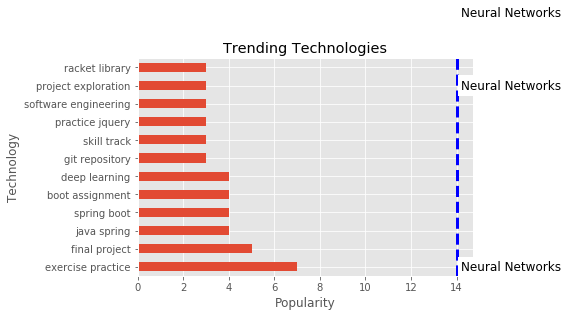

In [34]:
df=pd.DataFrame(frequency)

import matplotlib.pyplot as plt

plt.style.use('ggplot')

df.set_index([0], inplace = True)

df.sort_values(by = [1], ascending = False).head(20).plot(kind = 'barh')

plt.title('Trending Technologies')

plt.ylabel('Technology')

plt.xlabel('Popularity')

plt.legend().set_visible(False)

plt.axvline(x=14, color='b', label='Average', linestyle='--', linewidth=3)

for custom in [0, 10, 14]:
    plt.text(14.2, custom, "Neural Networks", fontsize = 12, va = 'center',bbox = dict(boxstyle='square', fc='white', ec='none'))

plt.show()


## Programming languages

In [45]:
queries = ["created:>2017-01-01", "created:2015-01-01..2015-12-31","created:2016-01-01..2016-12-31"]

df = pd.DataFrame()

for query in queries:

    data = search_repo_paging(query)

    data = pd.io.json.json_normalize(data)

    df = pd.concat([df, data])
    
df['created_at'] = df['created_at'].apply(pd.to_datetime)

df = df.set_index(['created_at'])


TypeError: 'NoneType' object is not subscriptable

In [42]:
fig, ax = plt.subplots()

dx = pd.DataFrame(df.groupby(['language', df.index.year])['language'].count())

dx.unstack().plot(kind='bar', title = 'Programming Languages per Year', ax = ax)

ax.legend(['2015', '2016', '2017'], title = 'Year')

plt.show()

AttributeError: 'Index' object has no attribute 'year'

## Programming languages in top technologies

In [ ]:
technologies_list = ['software engineering', 'deep learning', 'open source', 'exercise practice']

for tech in technologies_list:

    print(tech)

    print(set(df[df['clean'].str.contains(tech)]['language']))

## Top repositories by technology

In [ ]:
technologies_list = ['software engineering', 'deep learning', 'open source', 'exercise practice']

result = df.sort_values(by='watchers_count', ascending=False)

for tech in technologies_list:

    subset = result[result['clean'].str.contains(tech)].head(5)

    print(tech)

    for i,line in subset.iterrows():

        print(line['name'])

        print(line['description'])

        print('\n')

## Forks, open_issues, size, watchers count

In [ ]:
df.groupby('technology')['forks', 'watchers', 'size', 'open_issues'].mean()
df.groupby('technology')['forks', 'watchers', 'size', 'open_issues'].min()
df.groupby('technology')['forks', 'watchers', 'size', 'open_issues'].max()

## Forks vs open issues

In [ ]:
x = df['forks']

y = df['open_issues']

fig, ax = plt.subplots()

colors = dict(zip(set(df['technology']), ['red', 'blue']))

ax.scatter(x=x, y=y, c=df['technology'].apply(lambda x: colors[x]), s = 200, alpha = 0.5)
ax.set(title='Deep Learning and Open Source Technologies', xlabel='Number of forks', ylabel='Number of open issues')

plt.show()

## Forks vs size

In [ ]:
x = df['forks']

y = df['size']

ax.set(title='Deep Learning and Open Source Technologies', xlabel='Number of forks', ylabel='Repos size')

plt.show()

## Forks vs watchers

In [ ]:
x = df['watchers']

y = df['forks']

ax.set(title='Deep Learning and Open Source Technologies', xlabel='Number of watchers', ylabel='Number of forks')

plt.show()

## Open issues versus size

In [ ]:
x = df['open_issues']

y = df['size']

ax.set(title='Deep Learning and Open Source Technologies', xlabel='Number of open issues', ylabel='Repos size')

plt.show()

## Open issues versus Watchers

In [ ]:
x = df['open_issues']

y = df['watchers']

ax.set(title='Deep Learning and Open Source Technologies', xlabel='Number of open issues', ylabel='Number of watchers')

plt.show()

## Size vs watchers

In [ ]:
x = df['size']

y = df['watchers']

ax.set(title='Deep Learning and Open Source Technologies', xlabel='Repos size', ylabel='Number of watchers')
       
plt.show()